In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('gold.csv')

In [117]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [115]:
df.shape

(2290, 8)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [61]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

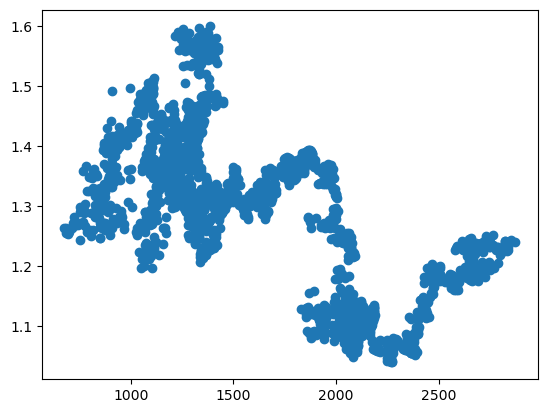

In [62]:
plt.scatter(df['SPX'], df['EUR/USD'])

In [63]:
# sns.pairplot(df)

In [64]:
# sns.pairplot(df, hue = "EUR/USD")

In [123]:
def dateProcessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df.drop(columns = ['Date'])
    df = df.drop("Date", axis = 1)
    return df
#     df = df.drop("Date", axis = 1)

In [66]:
# df['Date1'] = pd.to_datetime(df['Date'])

In [67]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [68]:
# df['Day'] = df['Date1'].dt.day
# df['Month'] = df['Date1'].dt.month
# df['year'] = df['Date1'].dt.year

In [69]:
# df = df.apply(dateProcessing())

In [124]:
df = dateProcessing(df)

In [109]:
# df = df.drop("Date", axis = 1)

In [125]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [126]:
# df = df.drop(columns = ['Date', 'Date1'])

In [127]:
x = df.drop("EUR/USD", axis = 1)

In [128]:
y = df['EUR/USD']

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44)

In [132]:
x_train_scaled = scaler.fit_transform(x_train)

In [133]:
x_test_scaled = scaler.transform(x_test)

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [135]:
model = LinearRegression()

In [136]:
poly = PolynomialFeatures(degree = 5)

In [137]:
x_train_poly = poly.fit_transform(x_train_scaled)

In [138]:
x_test_poly = poly.transform(x_test_scaled)

In [139]:
model.fit(x_train_poly, y_train)

LinearRegression()

In [140]:
y_pred = model.predict(x_test_poly)

In [141]:
from sklearn.metrics import accuracy_score, r2_score

In [142]:
r2_score(y_pred, y_test)

0.9460166614880033

In [213]:
from sklearn.pipeline import Pipeline

In [235]:
import pickle

In [283]:
pipe = Pipeline(steps = [
    ("scaling" , scaler),
    ("polynomial_featuring", poly),
    ("model", model)
])

In [276]:
pipe1.fit(x_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('polynomial_featuring', PolynomialFeatures(degree=5)),
                ('model', LinearRegression())])

In [277]:
y_pred = pipe1.predict(x_test)

In [278]:
r2_score(y_pred, y_test)

0.9460166614880033

In [284]:
with open("GoldPricePrediction.pkl", "wb") as file:
    pickle.dump(pipe, file)

In [285]:
with open("GoldPricePrediction.pkl", "rb") as file:
    model1 = pickle.load(file)

In [286]:
model1

Pipeline(steps=[('scaling', StandardScaler()),
                ('polynomial_featuring', PolynomialFeatures(degree=5)),
                ('model', LinearRegression())])

In [287]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [288]:
df1 = {
    "SPX" : [1447.16],
    "GLD" : [84.57],
    "USO" : [78.47],
    "SLV" : [15.18],
    "Date" : ["2/1/2008"]
}

In [289]:
df1 = pd.DataFrame(df1)

In [290]:
df1

,SPX,GLD,USO,SLV,Date
0,1447.16,84.57,78.47,15.18,2/1/2008


In [291]:
df1 = dateProcessing(df1)

In [292]:
df1

,SPX,GLD,USO,SLV,Day,Month,Year
0,1447.16,84.57,78.47,15.18,1,2,2008


In [293]:
pipe1.predict(df1)

array([1.45202923])